In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [2]:
onecall = True  # 8 days
#onecall = False # 5 days

In [3]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [4]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [5]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [6]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,04/09,07:12,20:27,08:27,20:58,0.04,"{'day': 20.95, 'min': 16.69, 'max': 23.63, 'ni...","{'day': 20.64, 'night': 20.16, 'eve': 22.51, '...",1017,59,12.64,2.54,8,4.37,"[{'id': 500, 'main': 'Rain', 'description': 'l...",89,0.2,0.10,5.07
1,05/09,07:13,20:25,09:34,21:09,0.07,"{'day': 16.71, 'min': 16.65, 'max': 20.19, 'ni...","{'day': 16.68, 'night': 17.53, 'eve': 17.33, '...",1011,86,14.19,2.51,298,4.39,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,1.0,2.72,0.63
2,06/09,07:14,20:23,10:40,21:22,0.10,"{'day': 21.56, 'min': 17.19, 'max': 24.93, 'ni...","{'day': 21.16, 'night': 21.34, 'eve': 23.6, 'm...",1011,53,11.43,3.14,120,6.61,"[{'id': 804, 'main': 'Clouds', 'description': ...",99,0.0,NaN,4.92
3,07/09,07:16,20:21,11:49,21:37,0.13,"{'day': 24.97, 'min': 16.11, 'max': 24.97, 'ni...","{'day': 24.78, 'night': 16.05, 'eve': 17.31, '...",1008,48,13.07,3.55,191,9.04,"[{'id': 502, 'main': 'Rain', 'description': 'h...",100,1.0,13.65,3.00
4,08/09,07:17,20:18,12:59,21:55,0.16,"{'day': 21.17, 'min': 14.16, 'max': 23.55, 'ni...","{'day': 20.67, 'night': 18.25, 'eve': 20.02, '...",1012,51,10.53,5.15,179,10.47,"[{'id': 500, 'main': 'Rain', 'description': 'l...",44,1.0,1.23,2.27
5,09/09,07:19,20:16,14:11,22:18,0.19,"{'day': 19.41, 'min': 15.83, 'max': 21.21, 'ni...","{'day': 19.26, 'night': 18.49, 'eve': 19.71, '...",1009,71,13.80,4.35,145,10.60,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.0,5.55,3.00
6,10/09,07:20,20:14,15:23,22:51,0.22,"{'day': 17.19, 'min': 16.27, 'max': 18.82, 'ni...","{'day': 17.08, 'night': 17.91, 'eve': 18.29, '...",1012,81,13.74,4.52,333,10.16,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.0,1.89,3.00
7,11/09,07:22,20:12,16:30,23:37,0.25,"{'day': 21.7, 'min': 15.19, 'max': 21.7, 'nigh...","{'day': 21.13, 'night': 18.84, 'eve': 19.83, '...",1012,46,9.47,2.75,325,7.51,"[{'id': 804, 'main': 'Clouds', 'description': ...",97,0.0,NaN,3.00


In [7]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [8]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            05/09
sunrise       07:13
sunset        20:25
moonrise      09:34
moonset       21:09
moon_phase     0.07
pressure       1011
humidity         86
dew_point     14.19
wind_speed     2.51
wind_deg        298
wind_gust      4.39
pop             1.0
rain           2.72
uvi            0.63
Name: 1, dtype: object

In [9]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [10]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        04/09
sunrise                                                   07:12
sunset                                                    20:27
moonrise                                                  08:27
moonset                                                   20:58
moon_phase                                                 0.04
temp          {'day': 20.95, 'min': 16.69, 'max': 23.63, 'ni...
feels_like    {'day': 20.64, 'night': 20.16, 'eve': 22.51, '...
pressure                                                   1017
humidity                                                     59
dew_point                                                 12.64
wind_speed                                                 2.54
wind_deg                                                      8
wind_gust                                                  4.37
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                      

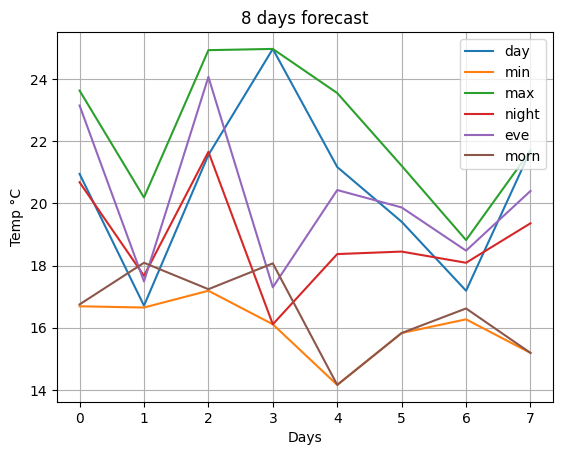

In [11]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [12]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1725440400, 'main': {'temp': 17.67, 'feels_like': 17.56, 'temp_min': 17.67, 'temp_max': 19.62, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 1008, 'humidity': 79, 'temp_kf': -1.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 83}, 'wind': {'speed': 1.16, 'deg': 329, 'gust': 1.02}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-04 09:00:00'}, {'dt': 1725451200, 'main': {'temp': 20.6, 'feels_like': 20.31, 'temp_min': 20.6, 'temp_max': 22.55, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 1007, 'humidity': 61, 'temp_kf': -1.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 84}, 'wind': {'speed': 2.1, 'deg': 302, 'gust': 2.16}, 'visibility': 10000, 'pop': 0.2, 'rain': {'3h': 0.17}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-04 12:00:00'}, {'dt': 1725462000, 'main

In [13]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1725440400
main          {'temp': 17.67, 'feels_like': 17.56, 'temp_min...
weather       [{'id': 803, 'main': 'Clouds', 'description': ...
clouds                                              {'all': 83}
wind                  {'speed': 1.16, 'deg': 329, 'gust': 1.02}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-09-04 09:00:00
rain                                                        NaN
Name: 0, dtype: object


In [14]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [15]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   04/09 11:00  11:00     19.62     17.67
1   04/09 14:00  14:00     22.55     20.60
2   04/09 17:00  17:00     23.62     23.62
3   04/09 20:00  20:00     22.72     22.72
4   04/09 23:00  23:00     20.68     20.68
5   05/09 02:00  02:00     19.76     19.76
6   05/09 05:00  05:00     18.53     18.53
7   05/09 08:00  08:00     17.43     17.43
8   05/09 11:00  11:00     16.65     16.65
9   05/09 14:00  14:00     16.84     16.84
10  05/09 17:00  17:00     17.64     17.64
11  05/09 20:00  20:00     17.55     17.55
12  05/09 23:00  23:00     17.67     17.67
13  06/09 02:00  02:00     17.62     17.62
14  06/09 05:00  05:00     17.54     17.54
15  06/09 08:00  08:00     17.19     17.19
16  06/09 11:00  11:00     19.60     19.60
17  06/09 14:00  14:00     23.08     23.08
18  06/09 17:00  17:00     24.57     24.57
19  06/09 20:00  20:00     23.49     23.49
20  06/09 23:00  23:00     21.66     21.66
21  07/09 02:00  02:00     19.90     19.90
22  07/09 0

In [16]:
_5days['human_date']

0     04/09 11:00
1     04/09 14:00
2     04/09 17:00
3     04/09 20:00
4     04/09 23:00
5     05/09 02:00
6     05/09 05:00
7     05/09 08:00
8     05/09 11:00
9     05/09 14:00
10    05/09 17:00
11    05/09 20:00
12    05/09 23:00
13    06/09 02:00
14    06/09 05:00
15    06/09 08:00
16    06/09 11:00
17    06/09 14:00
18    06/09 17:00
19    06/09 20:00
20    06/09 23:00
21    07/09 02:00
22    07/09 05:00
23    07/09 08:00
24    07/09 11:00
25    07/09 14:00
26    07/09 17:00
27    07/09 20:00
28    07/09 23:00
29    08/09 02:00
30    08/09 05:00
31    08/09 08:00
32    08/09 11:00
33    08/09 14:00
34    08/09 17:00
35    08/09 20:00
36    08/09 23:00
37    09/09 02:00
38    09/09 05:00
39    09/09 08:00
Name: human_date, dtype: object

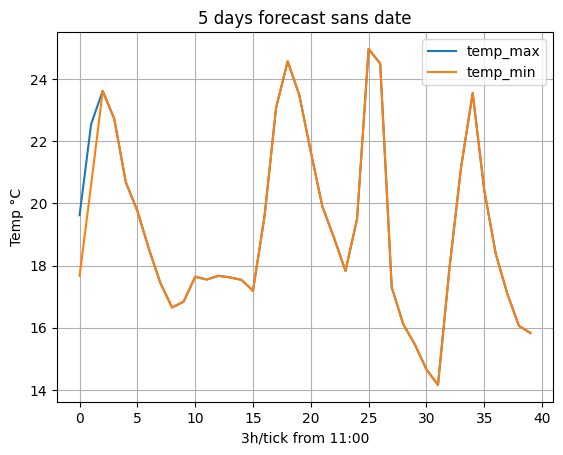

In [17]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [18]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

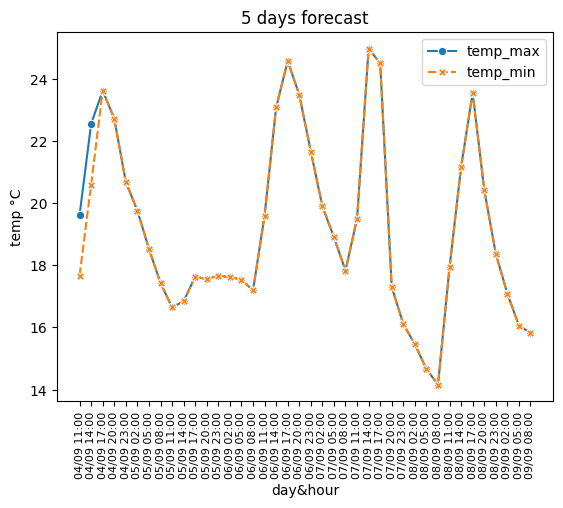

In [19]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

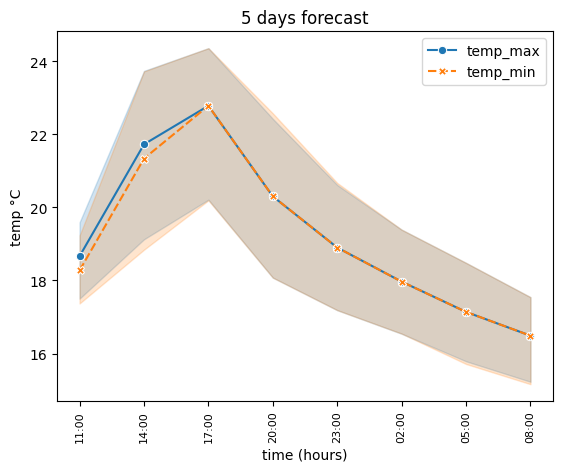

In [20]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 